In [1]:
import scanpy as sc
import scFates as scf

In [2]:
adata = sc.read("adata_tree.h5ad")

In [3]:
root="Progenitors"
miles=["trichoblast","atrichoblast"]

In [4]:
scf.tl.test_fork(adata,root,miles,n_jobs=40,rescale=True)

testing fork
    single mapping


/home/lfaure/scFates/scFates/tools/bifurcation_tools.py:157: FutureWarning: In a future version of pandas all arguments of Index.drop_duplicates will be keyword-only.
  brcells = brcells.loc[brcells.index.drop_duplicates(False)]


    Differential expression: 100%|██████████| 3962/3962 [00:33<00:00, 118.38it/s]
    test for upregulation for each leave vs root
    upreg atrichoblast: 100%|██████████| 1829/1829 [00:02<00:00, 884.96it/s]
    finished (0:00:40) --> added 
    .uns['Progenitors->trichoblast<>atrichoblast']['fork'], DataFrame with fork test results.


In [5]:
scf.tl.branch_specific(adata,root,miles,effect=1)

    branch specific features: trichoblast: 192, atrichoblast: 75
    finished --> updated 
    .uns['Progenitors->trichoblast<>atrichoblast']['fork'], DataFrame updated with additionnal 'branch' column.


In [6]:
scf.tl.activation(adata,root,miles,pseudotime_offset=0,n_jobs=40,n_map=100)

testing activation
    mapping: 100%|██████████| 100/100 [01:42<00:00,  1.03s/it]
    threshold pseudotime is: 3.7099977555580392
    12 early and 180 late features specific to leave trichoblast
    18 early and 57 late features specific to leave atrichoblast
    finished (0:01:42) --> updated 
    .uns['Progenitors->trichoblast<>atrichoblast']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


In [39]:
import numpy as np
sels=np.array_split(adata.obs.t[adata.obs.seg=="1"].sort_values().index,5)

import pandas as pd
adata.uns['Progenitors->trichoblast<>atrichoblast']["cell_freq"]=[]
for i,cells in enumerate(sels):
    adata.uns['Progenitors->trichoblast<>atrichoblast']["cell_freq"].append(
        pd.Series(adata.obs_names.isin(cells)*1,index=adata.obs_names)
    )

In [40]:
scf.tl.slide_cors(adata,root,miles)

--> added 
    .uns['Progenitors->trichoblast<>atrichoblast']['corAB'], gene-gene correlation modules.


/home/lfaure/miniconda3/envs/rapids-22.06/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:215: RuntimeWarning: invalid value encountered in true_divide
  return self.cov / self.std / self.std[:, None]
/home/lfaure/miniconda3/envs/rapids-22.06/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:215: RuntimeWarning: invalid value encountered in true_divide
  return self.cov / self.std / self.std[:, None]


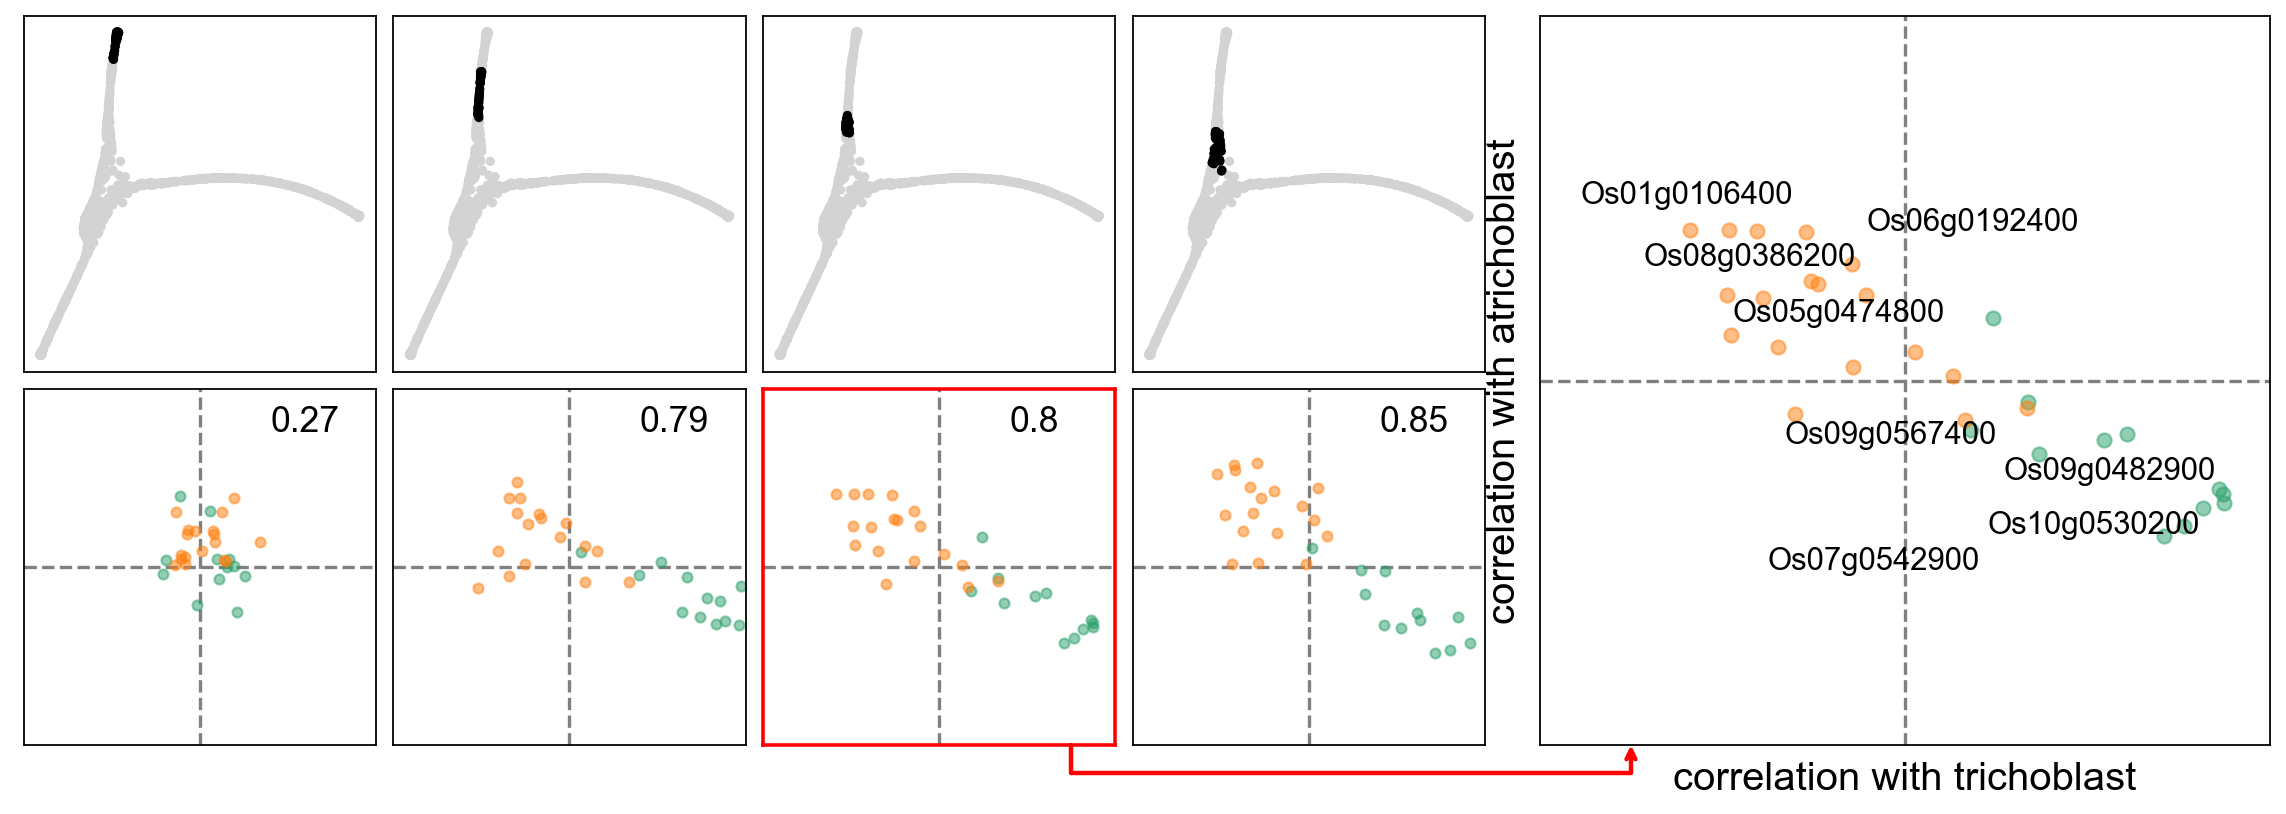

In [42]:
sc.set_figure_params()
scf.pl.slide_cors(adata,root,miles,basis="draw_graph_fa",win_keep=[0,2,3,4],focus=2)

In [43]:
scf.tl.synchro_path(adata,root,miles,w=50,step=10,winp=30,n_jobs=1,n_map=1)

computing local correlations
    single mapping
    to atrichoblast: 100%|██████████| 62/62 [00:00<00:00, 117.11it/s]
    finished (0:00:02) --> added 
    .uns['Progenitors->trichoblast<>atrichoblast']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Progenitors->trichoblast<>atrichoblast'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


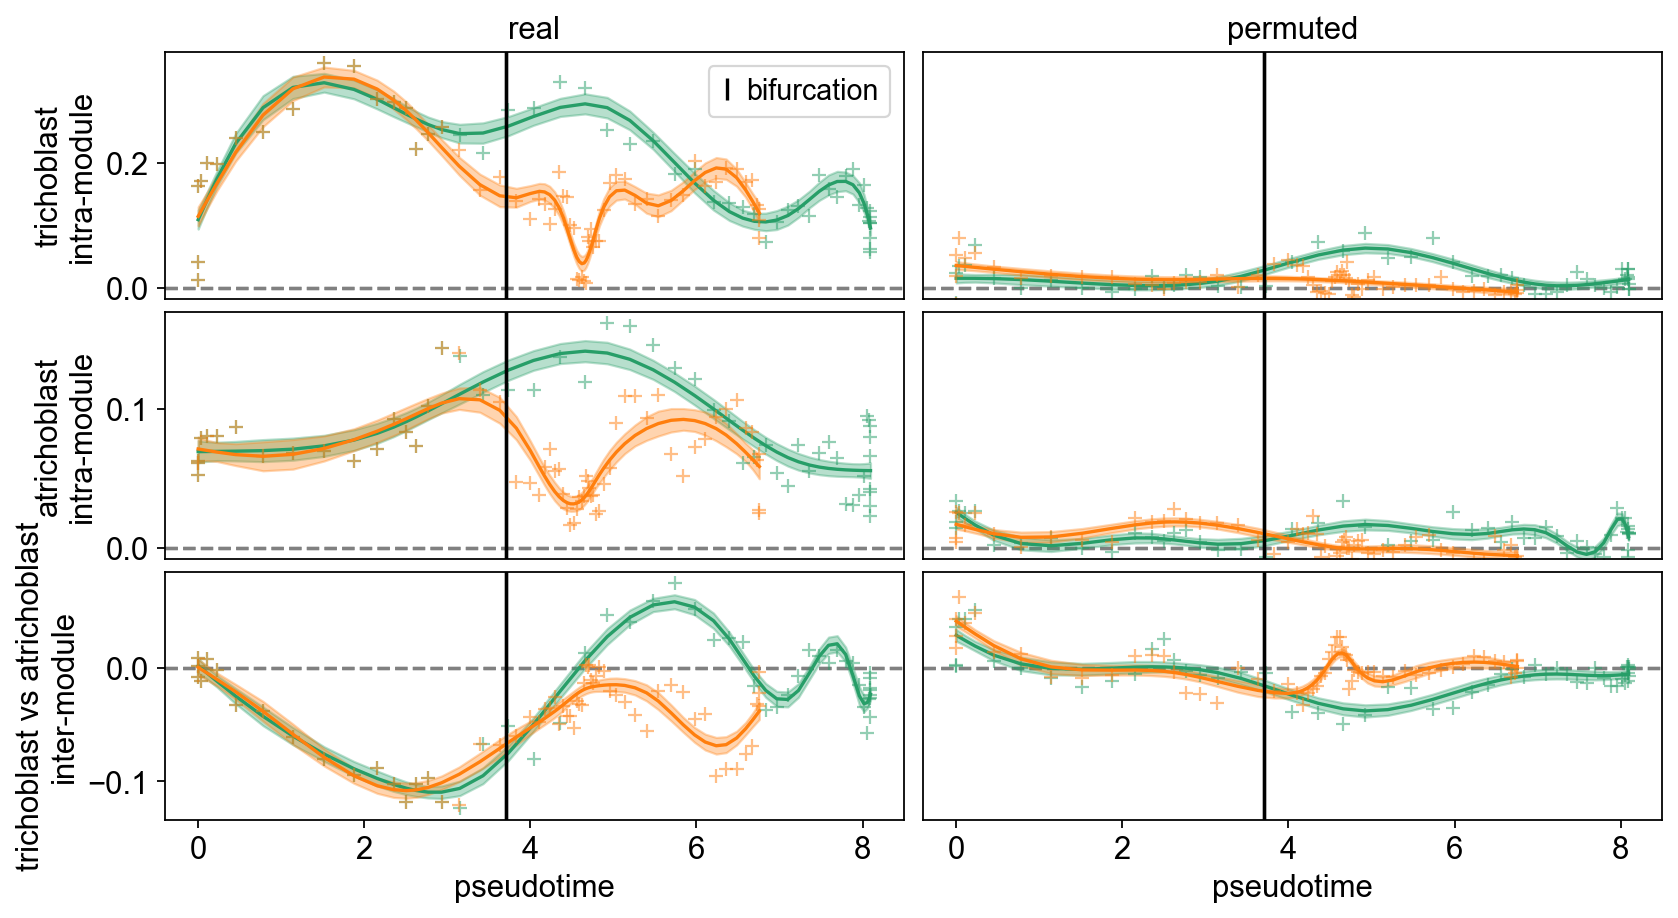

In [44]:
scf.pl.synchro_path(adata,root,miles)

In [45]:
scf.tl.synchro_path(adata,root,miles,w=50,step=10,winp=30,n_map=100,n_jobs=80)

computing local correlations
    multi mapping permutations: 100%|██████████| 100/100 [00:14<00:00,  6.80it/s]
    finished (0:00:54) --> added 
    .uns['Progenitors->trichoblast<>atrichoblast']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Progenitors->trichoblast<>atrichoblast'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


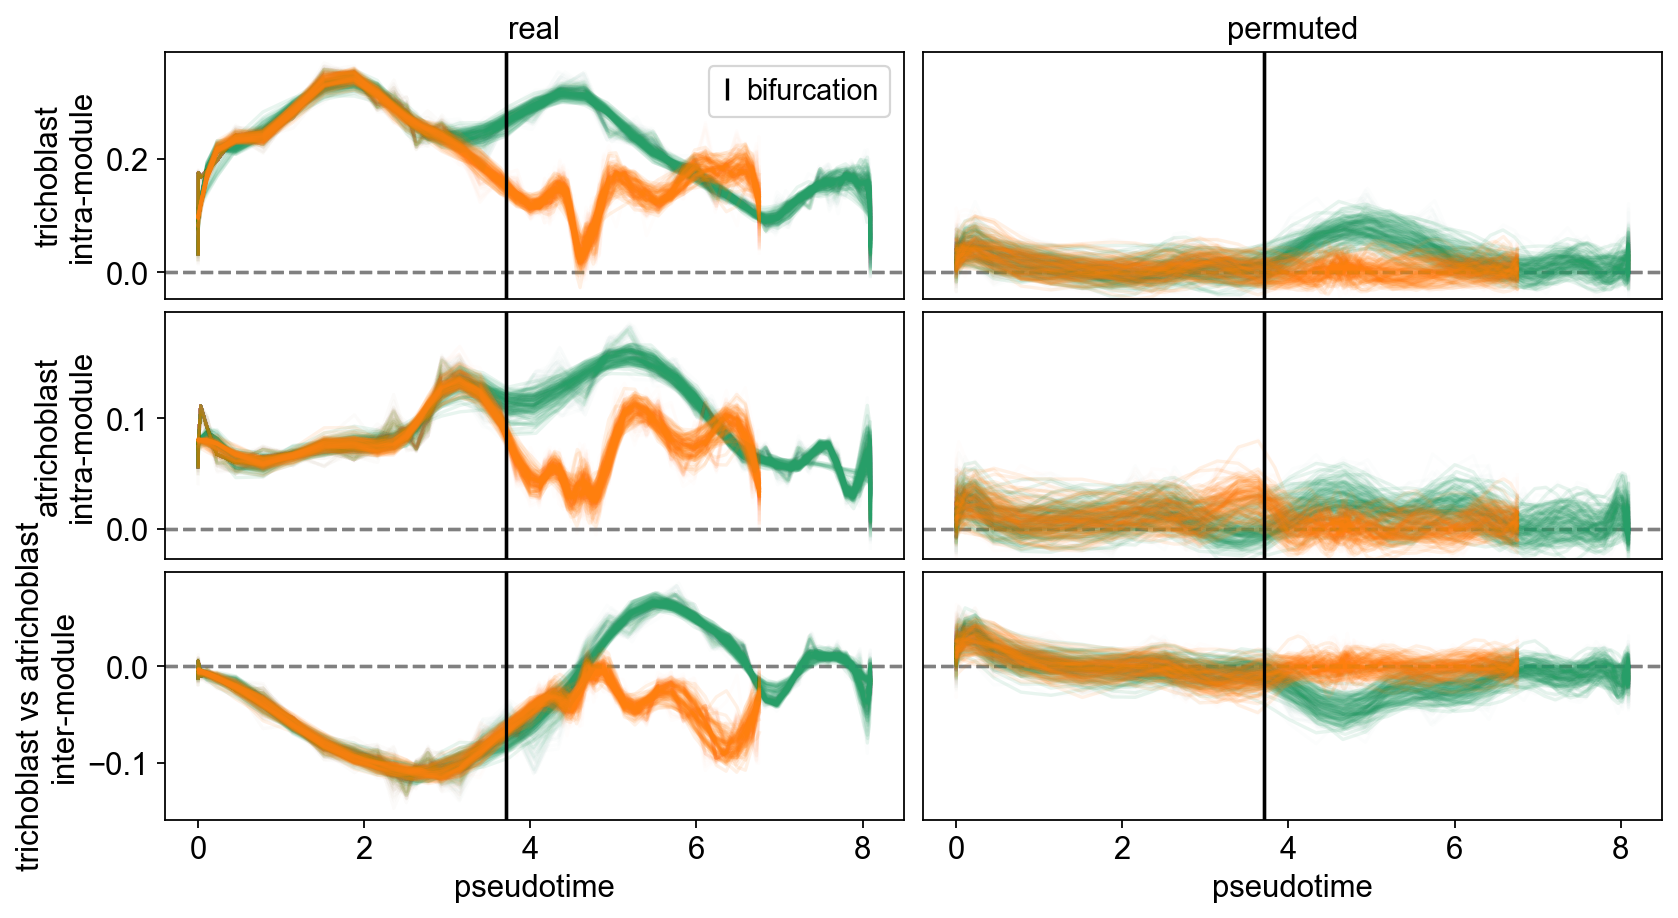

In [46]:
scf.pl.synchro_path(adata,root,miles,knots=20)

In [47]:
adata.write("adata_final.h5ad")